## Loading The Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
file_path = r'/Users/JumpMan/Downloads/Stock Market Projects/Amazon Stock/Amazon2025_Stock_Data.csv'
amazon_data = pd.read_csv(file_path)

In [6]:
amazon_data.head(10)

,date,open,high,low,close,adj_close,volume
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
5,1997-05-22 00:00:00-04:00,0.071875,0.072396,0.065625,0.069792,0.069792,235536000
6,1997-05-23 00:00:00-04:00,0.070313,0.076042,0.066667,0.075000,0.075000,318744000
7,1997-05-27 00:00:00-04:00,0.075521,0.082292,0.072917,0.079167,0.079167,173952000
8,1997-05-28 00:00:00-04:00,0.081250,0.081771,0.076563,0.076563,0.076563,91488000
9,1997-05-29 00:00:00-04:00,0.077083,0.077083,0.073958,0.075260,0.075260,69456000


In [7]:
# Convert 'date' to datetime format
amazon_data['date'] = pd.to_datetime(amazon_data['date'])

In [8]:
amazon_data.head(10)

,date,open,high,low,close,adj_close,volume
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
5,1997-05-22 00:00:00-04:00,0.071875,0.072396,0.065625,0.069792,0.069792,235536000
6,1997-05-23 00:00:00-04:00,0.070313,0.076042,0.066667,0.075000,0.075000,318744000
7,1997-05-27 00:00:00-04:00,0.075521,0.082292,0.072917,0.079167,0.079167,173952000
8,1997-05-28 00:00:00-04:00,0.081250,0.081771,0.076563,0.076563,0.076563,91488000
9,1997-05-29 00:00:00-04:00,0.077083,0.077083,0.073958,0.075260,0.075260,69456000


## Dataset Overview

In [9]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6986 non-null   object 
 1   open       6986 non-null   float64
 2   high       6986 non-null   float64
 3   low        6986 non-null   float64
 4   close      6986 non-null   float64
 5   adj_close  6986 non-null   float64
 6   volume     6986 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 382.2+ KB


In [10]:
amazon_data.describe()

,open,high,low,close,adj_close,volume
count,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6.986000e+03
mean,40.666560,41.139546,40.153303,40.659883,40.659883,1.360668e+08
std,58.107283,58.751435,57.401423,58.091213,58.091213,1.375800e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,2.100125,2.148125,2.064125,2.109750,2.109750,6.300350e+07
50%,9.033250,9.158500,8.921750,9.017000,9.017000,1.005360e+08
75%,72.673750,73.596622,71.368876,72.900251,72.900251,1.555295e+08
max,239.020004,242.520004,238.029999,242.059998,242.059998,2.086584e+09


## Data Visualization

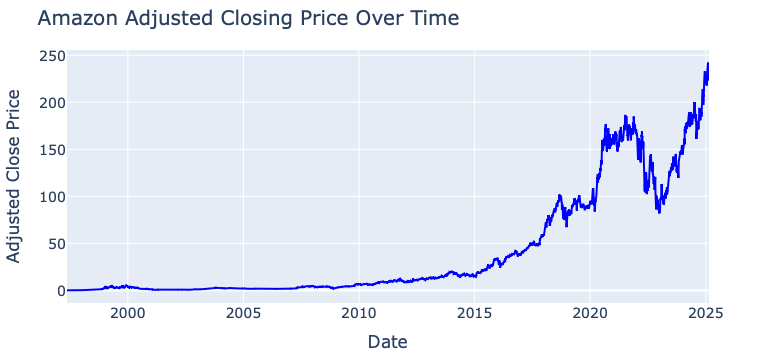

In [15]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the adjusted close price line
fig.add_trace(go.Scatter(x=amazon_data['date'], 
                         y=amazon_data['adj_close'], 
                         mode='lines', 
                         name='Adjusted Close Price', 
                         line=dict(color='blue', width=2)))

# Customize the layout for better aesthetics
fig.update_layout(
    title='Amazon Adjusted Closing Price Over Time',
    xaxis_title='Date',
    yaxis_title='Adjusted Close Price',
    template='plotly',  # Change background to light mode
    hovermode='x unified',  # Show data on hover for the whole line
    font=dict(size=14),
    margin=dict(l=50, r=50, t=50, b=50),
)

# Show the plot
fig.show()


### Amazon Trading Volume Over Time

This graph displays the **Amazon Trading Volume Over Time**, showing how the number of shares of Amazon traded in the stock market has fluctuated over a certain period.

#### Key Elements:
- **X-Axis (Date)**: Represents the timeline of the stock data. This axis shows the specific dates or time periods (usually on a daily or monthly basis) for the trading volume data.
- **Y-Axis (Volume)**: Represents the trading volume or the number of shares that were bought and sold on a given day or period. Higher values indicate more trading activity, while lower values indicate less activity.
- **Orange Line**: Represents the trading volume of Amazon on each date. Peaks in this line show days when Amazon experienced higher trading activity, and dips show days with lower trading volume.

#### Insights You Can Gather:
1. **High Trading Volume (Peaks)**: Large spikes in volume could indicate a significant event or news affecting Amazon's stock. These could be earnings announcements, product launches, market trends, or other major news that drives investors to buy or sell more shares.
   
2. **Low Trading Volume (Valleys)**: Days with lower trading volume often indicate more stable or uneventful periods, where fewer people are buying or selling. It could also reflect a seasonal slowdown or general market trends.

3. **Volatility**: Sudden and large shifts in the volume could signal higher market volatility, where there is increased uncertainty or excitement among traders.

#### Example:
- If you notice a significant spike in trading volume on a specific date, it could coincide with an earnings report or a broader market movement that had a major impact on Amazon's stock price.
- If you see periods of low volume, it could indicate times of calm or lack of major events.

#### Conclusion:
This graph provides a clear picture of how active the market is with Amazon’s stock. By monitoring volume, investors and analysts can gauge the level of interest and activity around Amazon’s stock, which can sometimes precede or follow significant price movements.


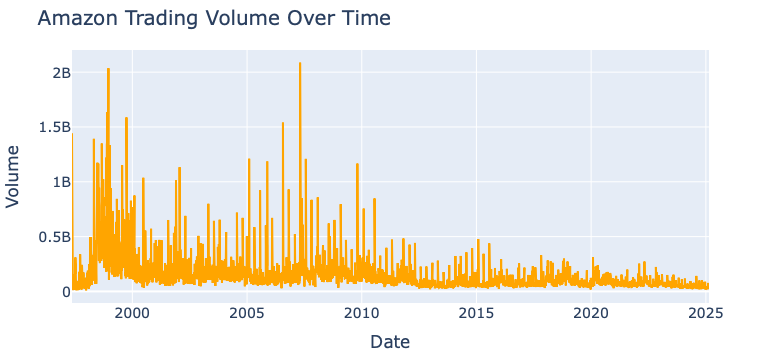

In [17]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the trading volume line
fig.add_trace(go.Scatter(x=amazon_data['date'], 
                         y=amazon_data['volume'], 
                         mode='lines', 
                         name='Trading Volume', 
                         line=dict(color='orange', width=2)))

# Customize the layout for better aesthetics
fig.update_layout(
    title='Amazon Trading Volume Over Time',
    xaxis_title='Date',
    yaxis_title='Volume',
    template='plotly',  # Light background
    hovermode='x unified',  # Show data on hover for the whole line
    font=dict(size=14),
    margin=dict(l=50, r=50, t=50, b=50),
)

# Show the plot
fig.show()


### Corr Matrix 

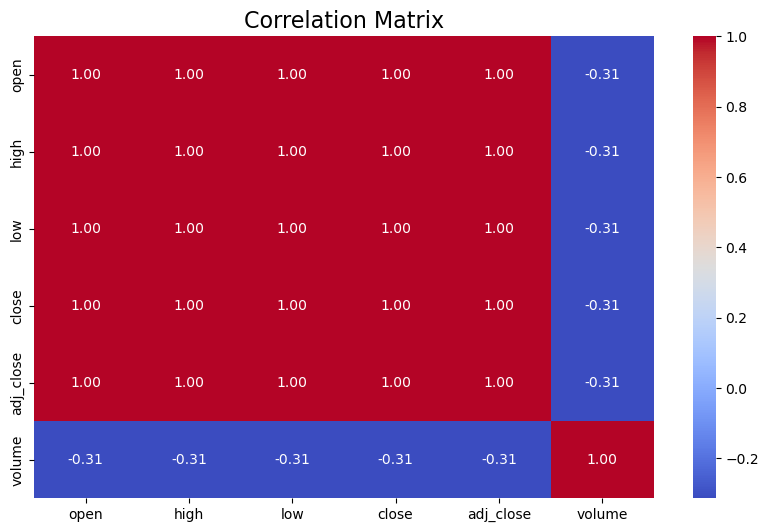

In [21]:
correlation_matrix = amazon_data[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

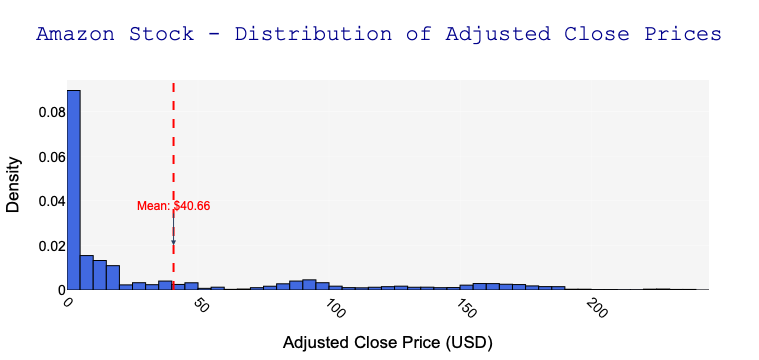

In [31]:
import plotly.express as px
import pandas as pd

# Define the file path for your local Amazon stock data
file_path = r'/Users/JumpMan/Downloads/Stock Market Projects/Amazon Stock/Amazon2025_Stock_Data.csv'

# Read the stock data from the CSV file
amazon_data = pd.read_csv(file_path)

# Check if data was successfully retrieved
if amazon_data.empty:
    raise ValueError("Failed to retrieve stock data.")

# Create a histogram for Amazon's adjusted closing price (Adj Close)
fig = px.histogram(
    amazon_data, 
    x='adj_close',  # Ensure the column name matches your CSV file's structure
    title="Distribution of Adjusted Close Prices",
    labels={"adj_close": "Adjusted Close Price (USD)"},
    color_discrete_sequence=['royalblue'],
    nbins=50,  # Number of bins
    histnorm='probability density',  # KDE-like behavior
)

# Add a smooth Kernel Density Estimate (KDE) line
fig.update_traces(
    histnorm='probability density',  # Normalize to density instead of count
    marker=dict(line=dict(color='black', width=1))  # Black border for bars
)

# Customize the layout for better aesthetics
fig.update_layout(
    title="Amazon Stock - Distribution of Adjusted Close Prices",
    title_x=0.5,  # Center the title
    title_font_size=20,
    title_font=dict(family="Courier New, monospace", color="darkblue", size=22),
    xaxis_title="Adjusted Close Price (USD)",
    yaxis_title="Density",
    xaxis=dict(tickangle=45, showgrid=True, gridwidth=0.2, zeroline=False),
    yaxis=dict(showgrid=True, gridwidth=0.2, zeroline=False),
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    plot_bgcolor="whitesmoke",
    margin=dict(l=50, r=50, t=80, b=50),
)

# Add a vertical line at the mean adjusted close price for reference
mean_price = amazon_data['adj_close'].mean()
fig.add_vline(x=mean_price, line=dict(color="red", dash="dash", width=2))

# Add annotation for the mean
fig.add_annotation(
    x=mean_price,
    y=0.02,  # Adjust to place the text below the line
    text=f"Mean: ${mean_price:.2f}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(size=12, color="red")
)

# Show the interactive plot
fig.show()


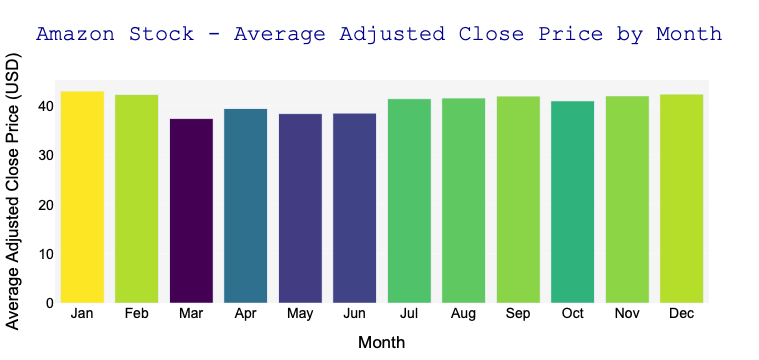

In [33]:
import pandas as pd
import plotly.express as px

# Assuming your 'amazon_data' DataFrame is already defined and processed
if not pd.api.types.is_datetime64_any_dtype(amazon_data['date']):
    amazon_data['date'] = pd.to_datetime(amazon_data['date'], utc=True)

# Extract the year and month from the date
amazon_data['year'] = amazon_data['date'].dt.year
amazon_data['month'] = amazon_data['date'].dt.month

# Calculate monthly average adjusted close price
monthly_avg = amazon_data.groupby('month')['adj_close'].mean()

# Create an interactive bar plot using Plotly
fig = px.bar(
    x=monthly_avg.index, 
    y=monthly_avg.values, 
    labels={"x": "Month", "y": "Average Adjusted Close Price (USD)"},
    title="Average Adjusted Close Price by Month",
    color=monthly_avg.values,  # Use color scale based on price values
    color_continuous_scale='Viridis'  # A pleasing color scale
)

# Customize the layout to make it more visually appealing
fig.update_layout(
    title="Amazon Stock - Average Adjusted Close Price by Month",
    title_x=0.5,  # Center the title
    title_font_size=20,
    title_font=dict(family="Courier New, monospace", color="darkblue", size=22),
    xaxis_title="Month",
    yaxis_title="Average Adjusted Close Price (USD)",
    xaxis=dict(tickmode='array', tickvals=monthly_avg.index, ticktext=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]),
    yaxis=dict(showgrid=True, gridwidth=0.2, zeroline=False),
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    plot_bgcolor="whitesmoke",
    margin=dict(l=50, r=50, t=80, b=50),
    coloraxis_showscale=False  # Turn off the color scale legend
)

# Show the interactive plot
fig.show()


## Machine Learning

In [35]:
# Preparing data for machine learning
features = ['open', 'high', 'low', 'volume']
target = 'adj_close'

X = amazon_data[features]
y = amazon_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Implementing the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100)
}

In [37]:
for name, model in models.items():
    model.fit(X_train_scaled if name == "Linear Regression" else X_train, y_train)
    y_pred = model.predict(X_test_scaled if name == "Linear Regression" else X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Linear Regression - MSE: 0.25, R2 Score: 1.00
Decision Tree Regressor - MSE: 0.63, R2 Score: 1.00
Random Forest Regressor - MSE: 0.44, R2 Score: 1.00


### Improving The Model

In [38]:
#Feature Engineering
amazon_data['7_day_avg'] = amazon_data['adj_close'].rolling(window=7).mean()
amazon_data['30_day_avg'] = amazon_data['adj_close'].rolling(window=30).mean()
amazon_data['daily_return'] = amazon_data['adj_close'].pct_change()


In [39]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


In [40]:
#Ensemble Methods
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

base_learners = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

stack_model = StackingRegressor(estimators=base_learners, final_estimator=RidgeCV())
stack_model.fit(X_train_scaled, y_train)
y_pred = stack_model.predict(X_test_scaled)

In [41]:
#Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(random_state=42, n_estimators=100), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean():.2f}")

Cross-validated MSE: 0.45


In [42]:
#Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 0.22, RMSE: 0.50


In [43]:
#Trying Other Models
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [44]:
#Model Stacking or Blending
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('dt', DecisionTreeRegressor(random_state=42))
])
voting_regressor.fit(X_train_scaled, y_train)
y_pred_voting = voting_regressor.predict(X_test_scaled)

In [45]:
#Advanced Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)
y_pred_lstm = model.predict(X_test_scaled)

2025-02-24 12:33:39.107893: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/JumpMan/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4134.4048
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 82.9639
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34.6341
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15.9778
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.5029
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.2153
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8581
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0306
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3750
Epoch 10/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8599
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [46]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=3)
X_selected = selector.fit_transform(X, y)


### Visualizing Actual vs Predicted Prices via Random Forest

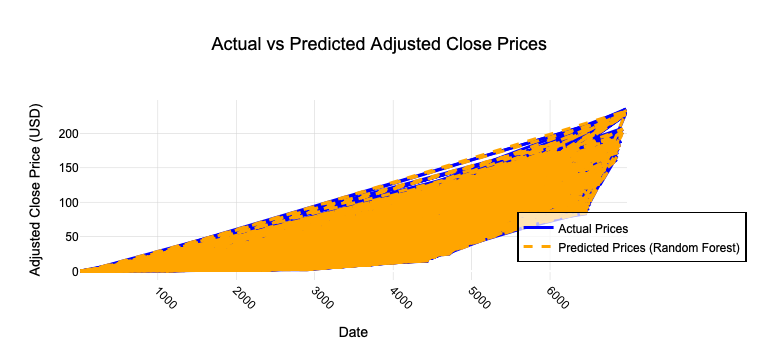

In [58]:
import plotly.graph_objects as go

# Actual vs Predicted Adjusted Close Prices
fig = go.Figure()

# Add the actual values
fig.add_trace(go.Scatter(
    x=y_test.index, 
    y=y_test.values, 
    mode='lines', 
    name='Actual Prices',
    line=dict(color='blue', width=3)
))

# Add the predicted values
fig.add_trace(go.Scatter(
    x=y_test.index, 
    y=y_pred_rf, 
    mode='lines', 
    name='Predicted Prices (Random Forest)', 
    line=dict(color='orange', width=3, dash='dash')
))

# Enhance the layout for better readability
fig.update_layout(
    title='Actual vs Predicted Adjusted Close Prices',
    title_x=0.5,
    title_font=dict(size=18, family="Arial, sans-serif", color="black"),
    xaxis_title='Date',
    yaxis_title='Adjusted Close Price (USD)',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    plot_bgcolor="white",
    xaxis=dict(
        tickangle=45, 
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True, 
        gridwidth=0.5, 
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True, 
        gridwidth=0.5, 
        gridcolor='lightgray'
    ),
    showlegend=True,
    legend=dict(
        x=0.8, 
        y=0.1,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor="Black", 
        borderwidth=1,
        font=dict(size=12)
    )
)

# Show the interactive plot
fig.show()


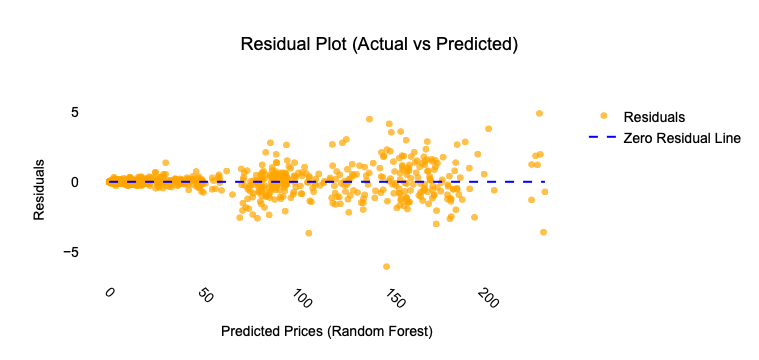

In [59]:
import plotly.graph_objects as go

# Calculate residuals
residuals = y_test - y_pred_rf

# Create a figure
fig = go.Figure()

# Add the residuals scatter plot
fig.add_trace(go.Scatter(
    x=y_pred_rf, 
    y=residuals, 
    mode='markers', 
    name='Residuals',
    marker=dict(color='orange', size=7, opacity=0.7)
))

# Add a horizontal line at y=0 (for reference)
fig.add_trace(go.Scatter(
    x=[min(y_pred_rf), max(y_pred_rf)], 
    y=[0, 0], 
    mode='lines', 
    name='Zero Residual Line',
    line=dict(color='blue', dash='dash')
))

# Enhance the layout for better aesthetics
fig.update_layout(
    title='Residual Plot (Actual vs Predicted)',
    title_x=0.5,
    title_font=dict(size=18, family="Arial, sans-serif", color="black"),
    xaxis_title='Predicted Prices (Random Forest)',
    yaxis_title='Residuals',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    plot_bgcolor="white",
    xaxis=dict(title_font=dict(size=14), tickangle=45),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=True
)

# Show the interactive plot
fig.show()


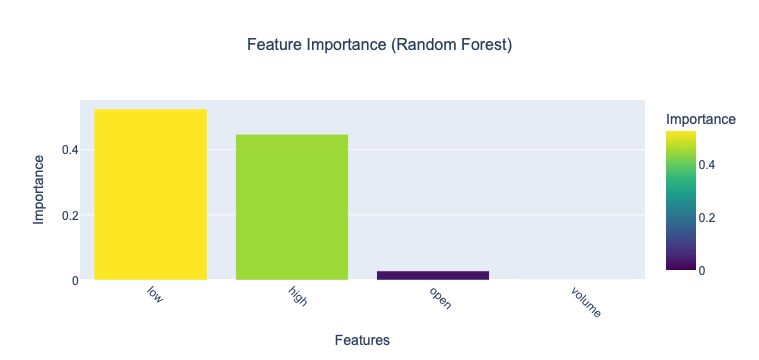

In [55]:
#Feature Importance(Random Forest)
import pandas as pd
import plotly.express as px

# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
fig = px.bar(feature_importance_df, x='Feature', y='Importance', 
             title='Feature Importance (Random Forest)', 
             labels={'Feature': 'Features', 'Importance': 'Importance'},
             color='Importance', color_continuous_scale='Viridis')

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=16),
    font=dict(family="Arial, sans-serif", size=12),
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


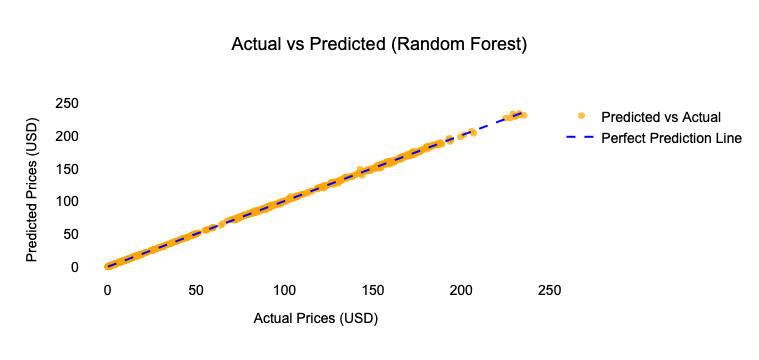

In [61]:
# Create scatter plot for actual vs predicted
fig = go.Figure()

# Add Actual vs Predicted scatter plot
fig.add_trace(go.Scatter(
    x=y_test, 
    y=y_pred_rf, 
    mode='markers', 
    name='Predicted vs Actual',
    marker=dict(color='orange', size=7, opacity=0.7)
))

# Add a diagonal line for perfect predictions
fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)], 
    y=[min(y_test), max(y_test)], 
    mode='lines', 
    name='Perfect Prediction Line',
    line=dict(color='blue', dash='dash')
))

# Enhance the layout
fig.update_layout(
    title='Actual vs Predicted (Random Forest)',
    title_x=0.5,
    title_font=dict(size=18, family="Arial, sans-serif", color="black"),
    xaxis_title='Actual Prices (USD)',
    yaxis_title='Predicted Prices (USD)',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    plot_bgcolor="white",
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=True
)

# Show the interactive plot
fig.show()


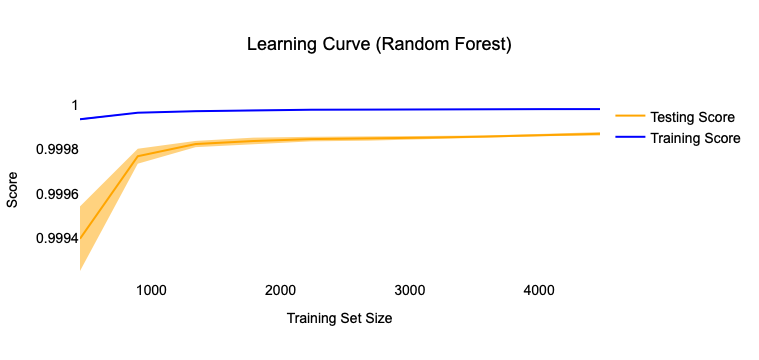

In [62]:
#Learning Curve(Training vs Validation Error)
from sklearn.model_selection import learning_curve

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# Calculate mean and std deviation for training and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Create a plot for the learning curve
fig = go.Figure()

# Plot training and testing scores
fig.add_trace(go.Scatter(
    x=train_sizes, 
    y=train_mean, 
    mode='lines', 
    name='Training Score',
    line=dict(color='blue', width=2)
))
fig.add_trace(go.Scatter(
    x=train_sizes, 
    y=test_mean, 
    mode='lines', 
    name='Testing Score',
    line=dict(color='orange', width=2)
))

# Add shaded areas for standard deviation
fig.add_trace(go.Scatter(
    x=train_sizes, 
    y=train_mean + train_std, 
    mode='lines', 
    fill=None, 
    line=dict(color='blue', width=0),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=train_sizes, 
    y=train_mean - train_std, 
    mode='lines', 
    fill='tonexty', 
    line=dict(color='blue', width=0),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=train_sizes, 
    y=test_mean + test_std, 
    mode='lines', 
    fill=None, 
    line=dict(color='orange', width=0),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=train_sizes, 
    y=test_mean - test_std, 
    mode='lines', 
    fill='tonexty', 
    line=dict(color='orange', width=0),
    showlegend=False
))

# Update layout
fig.update_layout(
    title="Learning Curve (Random Forest)",
    title_x=0.5,
    title_font=dict(size=18, family="Arial, sans-serif"),
    xaxis_title="Training Set Size",
    yaxis_title="Score",
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    plot_bgcolor="white",
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=True
)

# Show the interactive plot
fig.show()

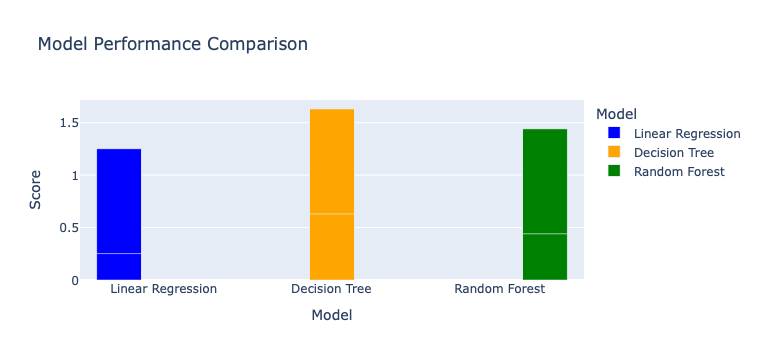

In [63]:
#Model Performance Comparison(Bar Chart)
# Create a DataFrame for model performance comparison
model_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [0.25, 0.63, 0.44],
    'R2': [1.00, 1.00, 1.00]
}

metrics_df = pd.DataFrame(model_metrics)

# Create a bar chart to compare model performance
fig = px.bar(
    metrics_df, 
    x='Model', 
    y=['MSE', 'R2'], 
    title="Model Performance Comparison",
    labels={'Model': 'Model', 'value': 'Score'},
    barmode='group', 
    color='Model',
    color_discrete_sequence=['blue', 'orange', 'green']
)

# Show the interactive plot
fig.show()


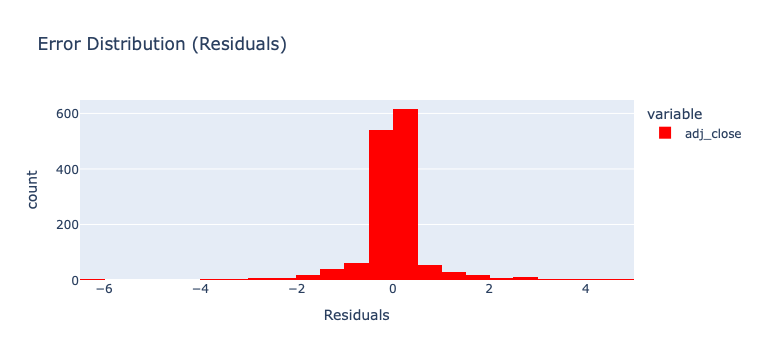

In [67]:
#Error Distribution (Histogram of Residuals)
# Create a histogram for residuals
fig = px.histogram(
    residuals, 
    title="Error Distribution (Residuals)",
    labels={'value': 'Residuals'},
    color_discrete_sequence=['red'],
    nbins=50
)

# Show the interactive plot
fig.show()
